In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Dense,Flatten
from keras.models import Sequential

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix

import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
print("X train : " ,x_train.shape)
print("X test : " ,x_test.shape)
print("y train : " ,y_train.shape)
print("y test : " ,y_test.shape)

X train :  (60000, 28, 28)
X test :  (10000, 28, 28)
y train :  (60000,)
y test :  (10000,)


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train=x_train/255.0

x_test=x_test/255.0

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
x_train.reshape(-1,28,28,1)
x_test.reshape(-1,28,28,1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

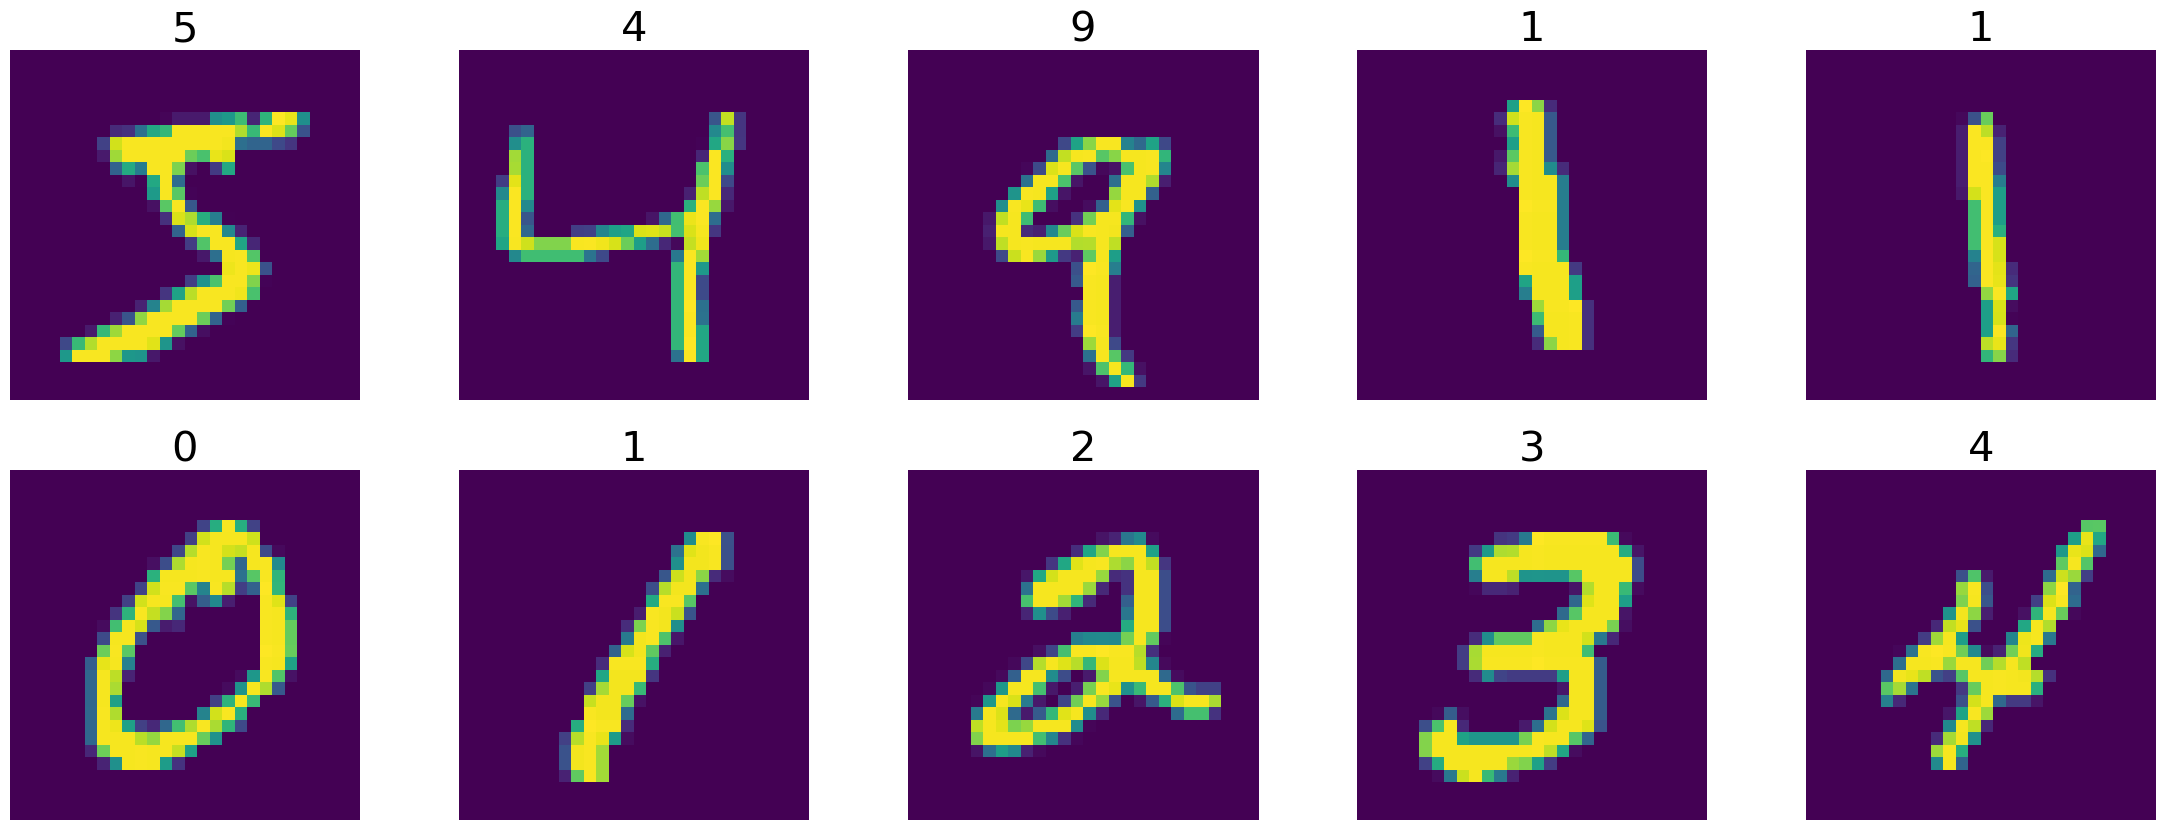

In [10]:
fig,ax=plt.subplots(2,5,figsize=(28,10))
for i in range(0,2):
    for j in range(0,5):
        ax[i,j].imshow(x_train[j+i+j])
        ax[i,j].axis('off')
        ax[i,j].set_title(y_train[j+i+j], fontsize=30)

In [11]:
test_x,x_val,test_y,y_val=train_test_split(x_test,y_test,test_size=.1,random_state=0)

In [12]:
test_x.shape

(9000, 28, 28)

In [13]:
x_val.shape

(1000, 28, 28)

In [14]:
y_train=to_categorical(y_train)
test_y=to_categorical(test_y)

In [15]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))    
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                        

In [17]:
#history=model.fit(x_train,y_train,validation_split=0.1,epochs=3,verbose=1)

In [18]:
'''datagen = ImageDataGenerator(
        rotation_range=15,  
        zoom_range = 0.01, 
        width_shift_range=0.1,  
        height_shift_range=0.1,) 

train_gen = datagen.flow(x_train, y_train, batch_size=128)
test_gen = datagen.flow(test_x, test_y, batch_size=128)'''

'datagen = ImageDataGenerator(\n        rotation_range=15,  \n        zoom_range = 0.01, \n        width_shift_range=0.1,  \n        height_shift_range=0.1,) \n\ntrain_gen = datagen.flow(x_train, y_train, batch_size=128)\ntest_gen = datagen.flow(test_x, test_y, batch_size=128)'

In [19]:
epochs = 5
batch_size = 128
train_steps = x_train.shape[0] // batch_size
valid_steps = test_x.shape[0] // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_acc", # metrics to monitor
        patience=4, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_acc",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
     )

In [20]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=10, callbacks=[es, rp],verbose=1)

Epoch 1/10
1688/1688 [==============================] - 105s 61ms/step - loss: 0.1247 - accuracy: 0.9615 - val_loss: 0.0578 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 2/10
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0643 - accuracy: 0.9807 - val_loss: 0.0644 - val_accuracy: 0.9825 - lr: 0.0010
Epoch 3/10
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0479 - accuracy: 0.9858 - val_loss: 0.0813 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 4/10
1688/1688 [==============================] - 103s 61ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0444 - val_accuracy: 0.9875 - lr: 0.0010
Epoch 5/10
1688/1688 [==============================] - 102s 61ms/step - loss: 0.0322 - accuracy: 0.9899 - val_loss: 0.0443 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 6/10
1688/1688 [==============================] - 102s 60ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0592 - val_accuracy: 0.9873 - lr: 0.0010
Epoch 7/10
1688/1688 [==================

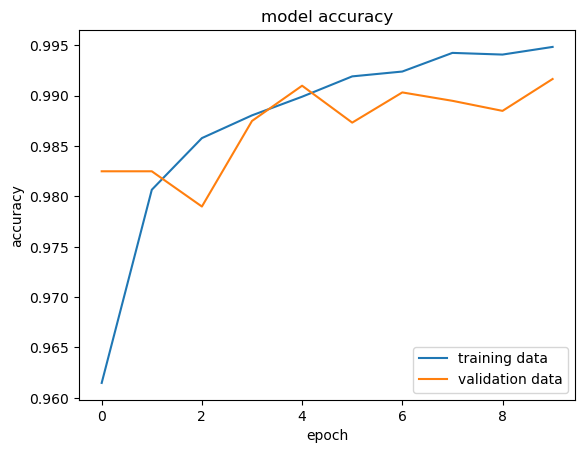

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

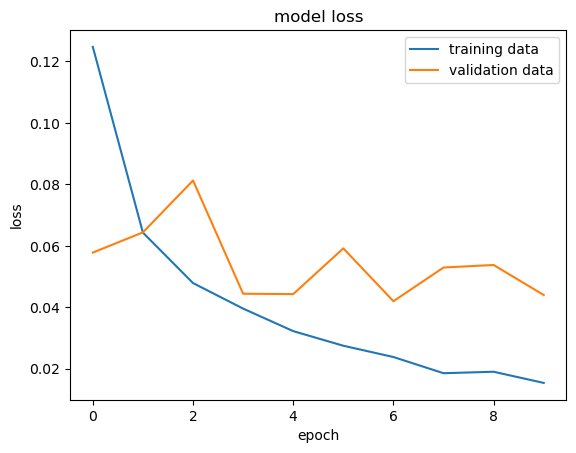

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

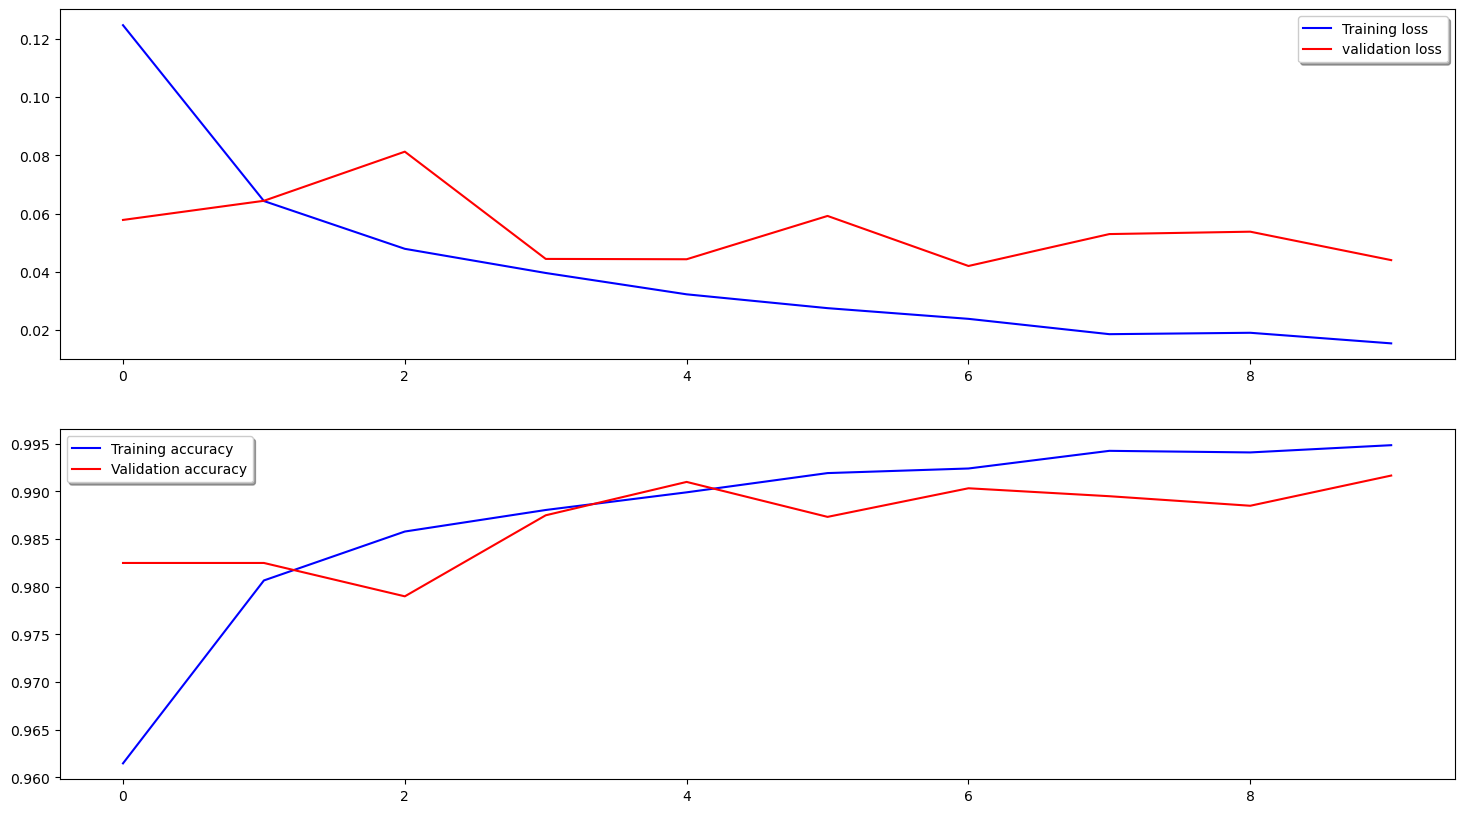

In [23]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [24]:
loss, accuracy = model.evaluate(test_x, test_y)
print('Test Accuracy =', accuracy)

282/282 [==============================] - 4s 14ms/step - loss: 0.0460 - accuracy: 0.9898
Test Accuracy = 0.9897778034210205
